In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
hd = pd.read_csv("https://raw.githubusercontent.com/CongLiu-CN/zero-to-mastery-ml/master/data/heart-disease.csv")
hd.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [2]:
X = hd.copy().drop(columns=['target'])
y = hd['target']

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
X_train.shape

(242, 13)

In [6]:
print(np.unique(X_train['oldpeak']))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.8 2.9 3.  3.1 3.2 3.4 3.5 3.6 3.8 4.
 4.2 5.6 6.2]


In [7]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
cls_svm = SVC()
cls_svm.fit(X_train, y_train)

SVC()

In [9]:
cls_log = LogisticRegression()
cls_log.fit(X_train, y_train)

C:\Users\E30794\.conda\envs\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [10]:
print(cls_svm.score(X_test, y_test))

0.6065573770491803


In [11]:
print(cls_log.score(X_test, y_test))

0.8524590163934426


In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [13]:
transforms = {}
for k in X_train.columns.values:
    if len(np.unique(X_train[k])) > 10:
        transforms[k] = StandardScaler().fit(X_train[k].values.reshape((-1,1)))
    else:
        transforms[k] = None

In [14]:
def transform(X: pd.DataFrame, transforms):
    X_ = X.copy()
    for k in X.columns.values:
        if transforms[k] is not None:
            X_[k] = transforms[k].transform(X[k].values.reshape((-1,1)))
    return X_

In [15]:
X_train_trans = transform(X_train, transforms)
X_test_trans = transform(X_test, transforms)

In [16]:
X_train_trans.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
143,1.382796,0,0,-1.464703,-0.452729,0,1,-0.354486,0,-0.625394,2,2,2
203,1.492765,1,2,2.704068,0.516327,1,0,-0.007000,1,0.500172,1,0,3
254,0.503041,1,3,1.577373,0.497326,0,0,-1.092894,0,-0.885140,2,0,2
42,-1.036529,1,0,-1.577373,-0.737745,0,0,-0.093871,1,1.712321,1,0,2
73,-0.376713,1,0,0.450678,0.269313,0,0,1.556687,1,-0.885140,2,0,2
208,-0.596652,1,2,-0.676017,-1.117767,0,1,-0.484793,0,0.846500,1,3,3
116,-1.476406,1,2,-0.112669,-0.623738,0,0,0.774843,0,0.846500,1,0,2
186,0.613011,1,0,-0.112669,0.117304,0,1,-0.267614,1,0.327008,2,1,3
221,0.063164,1,0,0.450678,-0.566735,0,1,-1.700994,1,3.963454,0,0,3
90,-0.706621,1,2,-0.450678,0.155306,1,1,1.078894,0,-0.885140,2,2,2


In [17]:
cls_svm = SVC()
cls_svm.fit(X_train_trans, y_train)
print(cls_svm.score(X_test_trans, y_test))

cls_log = LogisticRegression()
cls_log.fit(X_train_trans, y_train)
print(cls_log.score(X_test_trans, y_test))

0.819672131147541
0.8524590163934426


In [18]:
from sklearn.manifold import TSNE

C:\Users\E30794\.conda\envs\python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\E30794\.conda\envs\python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


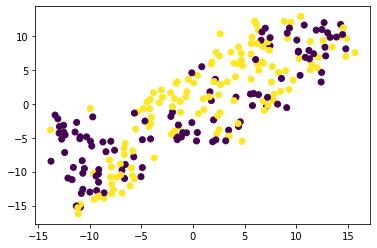

In [28]:
tsne = TSNE(n_components=2)
xtsne_train = tsne.fit_transform(X_train)

plt.scatter(xtsne_train[:,0], xtsne_train[:,1], c = y_train)
plt.show()

C:\Users\E30794\.conda\envs\python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\E30794\.conda\envs\python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


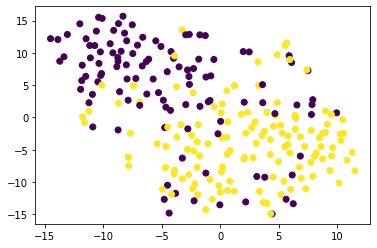

In [30]:
xtsne_train_trans = tsne.fit_transform(X_train_trans)
plt.scatter(xtsne_train_trans[:,0], xtsne_train_trans[:,1], c = y_train)
plt.show()